In [17]:
import pycountry
import os
import numpy as np
import lang2vec.lang2vec as l2v
from sklearn import preprocessing, neighbors, linear_model, multioutput

In [18]:
source_dir = "/data/rrjin/Graduation/data/bible-corpus/parallel_text"

In [19]:
def get_language_alpha3(language_code):
    ans = None
    if len(language_code) == 2:
        ans = pycountry.languages.get(alpha_2 = language_code)
    elif len(language_code) == 3:
        ans = pycountry.languages.get(alpha_3 = language_code)
    else:
        return "-1"
    if ans is not None:
        return ans.alpha_3
    else:
        return "unkown language"

In [20]:
def check_alpha3(alpha3):
    if alpha3 != "unkown language" and alpha3 in l2v.LANGUAGES:
        return True
    return False

In [21]:
langcode_to_alpha3 = {}
langcode_to_alpha3["jap"] = "jpn"

In [22]:
for data_set in os.listdir(source_dir):
    s = data_set[:-4]
    language1, language2 = s.split("-")
    language1_alpha3, language2_alpha3 = get_language_alpha3(language1), get_language_alpha3(language2)
    if check_alpha3(language1_alpha3):
        langcode_to_alpha3[language1] = language1_alpha3
    if check_alpha3(language2_alpha3):
        langcode_to_alpha3[language2] = language2_alpha3

In [23]:
len(langcode_to_alpha3)

96

In [24]:
lang_alpha3 = list(langcode_to_alpha3.values())

In [25]:
len(lang_alpha3)

96

In [26]:
feature_name = "syntax_wals"

In [27]:
features = l2v.get_features(lang_alpha3, feature_name, header=True)

In [28]:
features["CODE"]

['S_SVO',
 'S_SOV',
 'S_VSO',
 'S_VOS',
 'S_OVS',
 'S_OSV',
 'S_SUBJECT_BEFORE_VERB',
 'S_SUBJECT_AFTER_VERB',
 'S_OBJECT_AFTER_VERB',
 'S_OBJECT_BEFORE_VERB',
 'S_SUBJECT_BEFORE_OBJECT',
 'S_SUBJECT_AFTER_OBJECT',
 'S_GENDER_MARK',
 'S_SEX_MARK',
 'S_DEFINITE_AFFIX',
 'S_DEFINITE_WORD',
 'S_INDEFINITE_AFFIX',
 'S_INDEFINITE_WORD',
 'S_POSSESSIVE_PREFIX',
 'S_POSSESSIVE_SUFFIX',
 'S_ADPOSITION_BEFORE_NOUN',
 'S_ADPOSITION_AFTER_NOUN',
 'S_POSSESSOR_BEFORE_NOUN',
 'S_POSSESSOR_AFTER_NOUN',
 'S_ADJECTIVE_BEFORE_NOUN',
 'S_ADJECTIVE_AFTER_NOUN',
 'S_DEMONSTRATIVE_WORD_BEFORE_NOUN',
 'S_DEMONSTRATIVE_WORD_AFTER_NOUN',
 'S_DEMONSTRATIVE_PREFIX',
 'S_DEMONSTRATIVE_SUFFIX',
 'S_NUMERAL_BEFORE_NOUN',
 'S_NUMERAL_AFTER_NOUN',
 'S_RELATIVE_BEFORE_NOUN',
 'S_RELATIVE_AFTER_NOUN',
 'S_RELATIVE_AROUND_NOUN',
 'S_NOMINATIVE_VS_ACCUSATIVE_MARK',
 'S_ERGATIVE_VS_ABSOLUTIVE_MARK',
 'S_NEGATIVE_WORD_BEFORE_VERB',
 'S_NEGATIVE_PREFIX',
 'S_NEGATIVE_WORD_AFTER_VERB',
 'S_NEGATIVE_SUFFIX',
 'S_NEGATIVE_WOR

In [32]:
features_geo = l2v.get_features(lang_alpha3, "geo", header=True)

In [33]:
len(features_geo["eng"]), len(features_geo["CODE"])

(299, 299)

In [55]:
X = [features_geo[lang] for lang in lang_alpha3]

In [56]:
len(X), len(X[0])

(96, 299)

In [57]:
train_rate = 0.7

In [64]:
X_train = X[:int(len(X)*train_rate)]

In [66]:
len(X_train)

67

In [67]:
X_test = X[int(len(X)*train_rate):]

In [68]:
len(X_test)

29

In [71]:
score_dict = {}

In [72]:
for feat in range(len(features["CODE"])):
    Y = [features[lang][feat] if features[lang][feat] != "--" else -1 for lang in lang_alpha3]
    lab_enc = preprocessing.LabelEncoder()
    Y = lab_enc.fit_transform(Y)
    
    Y_train = Y[:int(len(X)*train_rate)]
    Y_test = Y[int(len(X)*train_rate):]
    
    if np.all(np.array(Y_train) == Y_train[0]):
        print("Feature {} has only one class!".format(features["CODE"][feat]))
        continue
    
    logistic_model = linear_model.LogisticRegression(max_iter=3000)
    clf = logistic_model.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    score_dict[features["CODE"][feat]] = score
    print("Feature {} accuracy is {}".format(features["CODE"][feat], score))

Feature S_SVO accuracy is 0.5862068965517241
Feature S_SOV accuracy is 0.5172413793103449
Feature S_VSO accuracy is 0.6551724137931034
Feature S_VOS accuracy is 0.7241379310344828
Feature S_OVS accuracy is 0.7586206896551724
Feature S_OSV accuracy is 0.7586206896551724
Feature S_SUBJECT_BEFORE_VERB accuracy is 0.7241379310344828
Feature S_SUBJECT_AFTER_VERB accuracy is 0.6206896551724138
Feature S_OBJECT_AFTER_VERB accuracy is 0.6551724137931034
Feature S_OBJECT_BEFORE_VERB accuracy is 0.5517241379310345
Feature S_SUBJECT_BEFORE_OBJECT accuracy is 0.7241379310344828
Feature S_SUBJECT_AFTER_OBJECT accuracy is 0.7241379310344828
Feature S_GENDER_MARK accuracy is 0.6206896551724138
Feature S_SEX_MARK accuracy is 0.6551724137931034
Feature S_DEFINITE_AFFIX accuracy is 0.5517241379310345
Feature S_DEFINITE_WORD accuracy is 0.4482758620689655
Feature S_INDEFINITE_AFFIX accuracy is 0.6206896551724138
Feature S_INDEFINITE_WORD accuracy is 0.41379310344827586
Feature S_POSSESSIVE_PREFIX accurac

In [93]:
len(score_dict)

98

In [74]:
import matplotlib.pyplot as plt

In [75]:
%matplotlib inline

In [82]:
x = list(range(6))

In [86]:
y = list(score_dict.values())[:6]

In [90]:
label = list(score_dict.keys())[:6]

In [91]:
label

['S_SVO', 'S_SOV', 'S_VSO', 'S_VOS', 'S_OVS', 'S_OSV']

<BarContainer object of 6 artists>

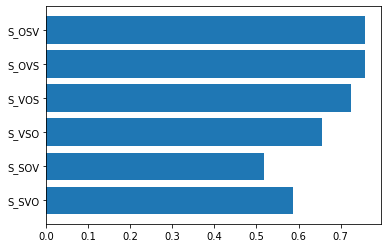

In [92]:
plt.barh(x, y, tick_label = label)